## Importing the required libraries 

In [2]:
import pandas as pd
import numpy as np

from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Reading the dataset

   SES  MMSE  eTIV   nWBV  CDR
0    2    27  1987  0.696  0.0
1    2    30  2004  0.681  0.0
2    0    23  1678  0.736  0.5
3    0    28  1738  0.713  0.5
4    0    22  1698  0.701  0.5


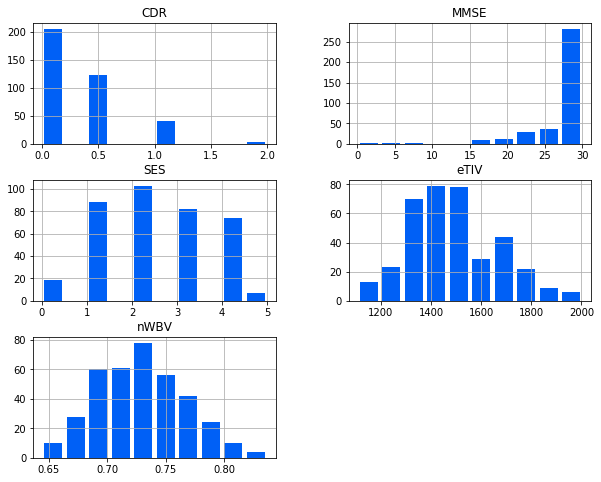

In [12]:
data = pd.read_csv('dataset_arranged.csv')
print(data.head())
data.hist(figsize=(10,8),grid=True,rwidth=0.8,color='#0060F6')
plt.show()

## Replacing the empty rows with the mean of their respective columns

In [13]:
replacezero = ['SES','MMSE','eTIV','nWBV']

for column in replacezero:
    data[column] = data[column].replace(0,np.nan)
    mean = int(data[column].mean(skipna=True))
    data[column] = data[column].replace(np.nan,mean)

## Splitting the data into test and train part

In [14]:
X = data.iloc[:,0:4]
Y = data.iloc[:,4]
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,random_state=11,test_size=0.2)

## Feature scaling

In [15]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\olimpia\Documents\Python Scripts\new\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Encoding data from continuous to multiclass

In [16]:
lab_enc = LabelEncoder()

ytrain_en = lab_enc.fit_transform(ytrain)
ytest_en = lab_enc.fit_transform(ytest)

print(utils.multiclass.type_of_target(ytrain))
print(utils.multiclass.type_of_target(ytrain_en))

print(utils.multiclass.type_of_target(ytest))
print(utils.multiclass.type_of_target(ytest_en))

continuous
multiclass
continuous
multiclass


## KNN model

Taking the values of k from 2 to 14

## Euclidean distance

In [17]:
#knn
kv = range(2,14)

# We can create Python dictionary using [] or dict()
# Using performance metrics accuracy, precision, recall and f1 score

accuracy1 = []
precision1 =[]
recall1 =[]
f1 = []

# We use a loop through the range 2 to 14
# We append the scores in the dictionary
for i in kv:
    model1 = KNeighborsClassifier(n_neighbors=i,p=2,metric='euclidean',weights='uniform')

    model1.fit(xtrain, ytrain_en)
    ypred1 = model1.predict(xtest)
    ypredf1 = pd.DataFrame(ypred1)
    
    accuracy1.append(metrics.accuracy_score(ytest_en, ypredf1))
    
    precision1.append(metrics.precision_score(ytest_en, ypredf1, average='macro'))
    
    recall1.append(metrics.recall_score(ytest_en, ypredf1, average='macro'))
    
    f1.append(metrics.f1_score(ytest_en, ypredf1, average='macro'))

print('Accuracy values are\n ')
print(accuracy1)

print('\nPrecision values for macro are')
print(precision1)

print('\nRecall values for macro are')
print(recall1)

print('\nF1 values are')
print(f1)

Accuracy values are
 
[0.76, 0.7866666666666666, 0.76, 0.7733333333333333, 0.7866666666666666, 0.7866666666666666, 0.7466666666666667, 0.7333333333333333, 0.7466666666666667, 0.7333333333333333, 0.7333333333333333, 0.6933333333333334]

Precision values for macro are
[0.7576623376623376, 0.7481392876129718, 0.7386324786324786, 0.7282242717025326, 0.7590686274509805, 0.7590686274509805, 0.7128205128205128, 0.6929971988795519, 0.6872082166199812, 0.6760531135531135, 0.6760531135531135, 0.6166666666666667]

Recall values for macro are
[0.73, 0.7616666666666667, 0.725, 0.7233333333333333, 0.7316666666666668, 0.7316666666666668, 0.6666666666666666, 0.6583333333333333, 0.6266666666666666, 0.6133333333333333, 0.6133333333333333, 0.5783333333333333]

F1 values are
[0.7234839234839234, 0.7481962481962481, 0.7067517278043592, 0.7183462532299741, 0.7351370851370852, 0.7351370851370852, 0.6652936689549963, 0.6566544566544567, 0.6403792286145227, 0.6255796061796935, 0.6255796061796935, 0.58075684380

## Manhattan distance

In [18]:
#knn
j = range(2,14)

# We can create Python dictionary using [] or dict()
accuracy2 = []
precision2 =[]
recall2 =[]
f2 = []

# We use a loop through the range 2 to 14
# We append the scores in the dictionary
for i in j:
    model2 = KNeighborsClassifier(n_neighbors=i,p=2,metric='manhattan',weights='uniform')

    model2.fit(xtrain, ytrain_en)
    ypred2 = model2.predict(xtest)
    ypredf2 = pd.DataFrame(ypred2)
    accuracy2.append(metrics.accuracy_score(ytest_en, ypredf2))
    
    precision2.append(metrics.precision_score(ytest_en, ypredf2, average='macro'))
    
    recall2.append(metrics.recall_score(ytest_en, ypredf2, average='macro'))
    
    f2.append(metrics.f1_score(ytest_en, ypredf2, average='macro'))

print('accuracy values are\n ')
print(accuracy2)

print('\nPrecision values for macro are')
print(precision2)

print('\nRecall values for macro are')
print(recall2)

print('\nF1 values or macro are')
print(f2)

accuracy values are
 
[0.76, 0.76, 0.76, 0.76, 0.7733333333333333, 0.7466666666666667, 0.8, 0.76, 0.76, 0.76, 0.76, 0.7466666666666667]

Precision values for macro are
[0.7102442868400315, 0.714496396849338, 0.7218717790146361, 0.6937080441460917, 0.7333333333333334, 0.7051767676767676, 0.8109259259259259, 0.7418367346938775, 0.7377777777777776, 0.749244142101285, 0.7452941176470588, 0.7340686274509803]

Recall values for macro are
[0.69, 0.735, 0.7050000000000001, 0.685, 0.6933333333333334, 0.6966666666666667, 0.7450000000000001, 0.71, 0.7050000000000001, 0.69, 0.685, 0.6716666666666667]

F1 values or macro are
[0.6927381270605008, 0.7125563268785774, 0.6976903870162298, 0.6798029556650245, 0.6962962962962963, 0.6889627987188963, 0.7621452003993724, 0.7130994793093999, 0.7055555555555554, 0.7084168045756757, 0.7015873015873014, 0.686798296554394]


## Minkowski distance

In [19]:
#knn
l = range(2,14)

# We can create Python dictionary using [] or dict()
accuracy3 = []
precision3 =[]
recall3 =[]
f3 = []

# We use a loop through the range 2 to 14
# We append the scores in the dictionary
for i in l:
    model3 = KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski',weights='uniform')

    model3.fit(xtrain, ytrain_en)
    ypred3 = model3.predict(xtest)
    ypredf3 = pd.DataFrame(ypred3)
    accuracy3.append(metrics.accuracy_score(ytest_en, ypredf3))
    
    precision3.append(metrics.precision_score(ytest_en, ypredf3, average='macro'))
    
    recall3.append(metrics.recall_score(ytest_en, ypredf3, average='macro'))
    
    f3.append(metrics.f1_score(ytest_en, ypredf3, average='macro'))

print('accuracy values are\n ')
print(accuracy3)

print('\nPrecision values for macro are')
print(precision3)

print('\nRecall values for macro are')
print(recall3)

print('\nF1 values or macro are')
print(f3)

accuracy values are
 
[0.76, 0.7866666666666666, 0.76, 0.7733333333333333, 0.7866666666666666, 0.7866666666666666, 0.7466666666666667, 0.7333333333333333, 0.7466666666666667, 0.7333333333333333, 0.7333333333333333, 0.6933333333333334]

Precision values for macro are
[0.7576623376623376, 0.7481392876129718, 0.7386324786324786, 0.7282242717025326, 0.7590686274509805, 0.7590686274509805, 0.7128205128205128, 0.6929971988795519, 0.6872082166199812, 0.6760531135531135, 0.6760531135531135, 0.6166666666666667]

Recall values for macro are
[0.73, 0.7616666666666667, 0.725, 0.7233333333333333, 0.7316666666666668, 0.7316666666666668, 0.6666666666666666, 0.6583333333333333, 0.6266666666666666, 0.6133333333333333, 0.6133333333333333, 0.5783333333333333]

F1 values or macro are
[0.7234839234839234, 0.7481962481962481, 0.7067517278043592, 0.7183462532299741, 0.7351370851370852, 0.7351370851370852, 0.6652936689549963, 0.6566544566544567, 0.6403792286145227, 0.6255796061796935, 0.6255796061796935, 0.58

In [20]:
# for visualization
from matplotlib import style

style.use('ggplot')

## Accuracy of the three distance metrics wrt increasing k values

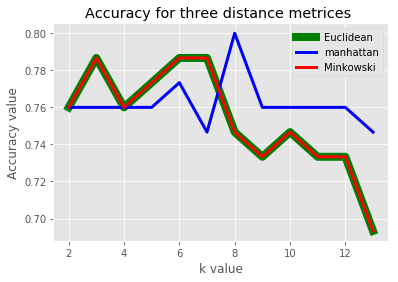

In [26]:
plt.plot(kv, accuracy1,'g',label ='Euclidean',linewidth =8)
plt.plot(j, accuracy2,'b',label='manhattan',linewidth=3)
plt.plot(l, accuracy3,'r',label='Minkowski',linewidth=3)
plt.title('Accuracy for three distance metrices ')
plt.ylabel('Accuracy value')
plt.xlabel('k value')
plt.legend()

## Precision of the three distance metrics wrt increasing k values

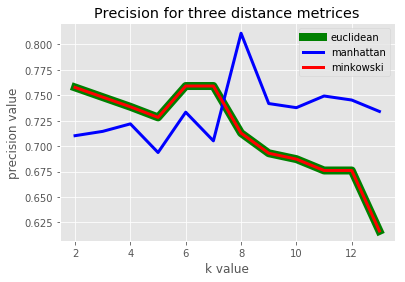

In [27]:
plt.plot(kv, precision1,'g',label ='euclidean',linewidth =8)
plt.plot(j, precision2,'b',label='manhattan',linewidth=3)
plt.plot(l, precision3,'r',label='minkowski',linewidth=3)
plt.title('Precision for three distance metrices')
plt.ylabel('precision value')
plt.xlabel('k value')
plt.legend()

## Recall of the three distance metrics wrt increasing k values

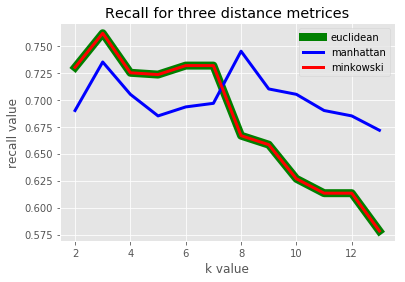

In [28]:
plt.plot(kv, recall1 ,'g',label ='euclidean',linewidth =8)
plt.plot(j,recall2,'b',label='manhattan',linewidth=3)
plt.plot(l,recall3,'r',label='minkowski',linewidth=3)
plt.title('Recall for three distance metrices')
plt.ylabel('recall value')
plt.xlabel('k value')
plt.legend()

## F1 score of the three distance metrics wrt increasing k values

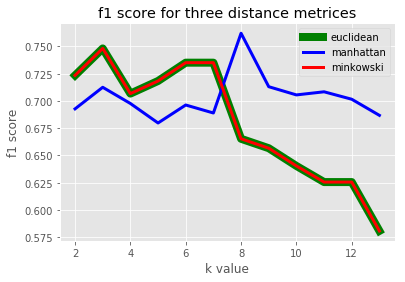

In [29]:
plt.plot(kv,f1,'g',label ='euclidean',linewidth =8)
plt.plot(j,f2,'b',label='manhattan',linewidth=3)
plt.plot(l,f3,'r',label='minkowski',linewidth=3)
plt.title('f1 score for three distance metrices')
plt.ylabel('f1 score')
plt.xlabel('k value')
plt.legend()